### LEON MANGALISO SIHLONGONYANE: ASSIGNMENT 2

#### Import module for capabilities

In [49]:
import numpy as np   #able to do numeracal operations
np.random.seed(1337) # for reproducibility
import pandas        #able to import CV files and other data manipulation
import tensorflow as tf   # able to apply nueral network modelling
from tensorflow.keras import Sequential # for plain stack of layers
from tensorflow.keras.layers import Dense  # to create fully connected layers
from tensorflow.keras import metrics #able to calculate accuracy of model
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor #The Keras wrappers return the mean loss
from sklearn.metrics import mean_squared_error  #for mean square error
from sklearn.preprocessing import StandardScaler #for scaling data
from sklearn.model_selection import train_test_split    #able to split data into training and testing
import matplotlib.pyplot as plt   # able to plot 
from sklearn.metrics import confusion_matrix, accuracy_score #able to calculate accuracy score for model
from keras.utils import np_utils    #able to do one hot encoding


#### Import data

In [50]:
data=pandas.read_csv("https://protect-za.mimecast.com/s/vYKICAnX51iR2wOPiM4hPa")
dataset = data.values   #we import CV file from online

In [51]:
data.head()  #view data

,var1,var2,var3,var4,var5,var6,var7,var8,target
0,1080.0,0.0,0.0,324.0,5.0,2080.0,1352.0,56,79.99
1,1080.0,0.0,0.0,324.0,5.0,2110.0,1352.0,56,61.89
2,665.0,285.0,0.0,456.0,0.0,1864.0,1188.0,540,40.27
3,665.0,285.0,0.0,456.0,0.0,1864.0,1188.0,730,41.05
4,397.2,264.8,0.0,384.0,0.0,1956.8,1651.0,720,44.30


In [52]:
data=StandardScaler().fit_transform(dataset)  #scaling data

In [53]:
data  #view data if scaled

array([[ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  2.64540763],
       [ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  1.56142148],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -2.24091255,
         3.55306569,  0.26662698],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ...,  0.08012724,
        -0.27973311, -0.72572939],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.19118775,
        -0.27973311, -0.18253855],
       [-0.19401043,  0.30850389,  0.37696733, ..., -0.15072887,
        -0.27973311, -0.20469738]])


pandas.read_csv("https://protect-za.mimecast.com/s/vYKICAnX51iR2wOPiM4hPa")


#### Assign X and Y datasets

In [54]:
X = data[:,0:8]  #attributes
Y = data[:,8]  #target

#### Check data shape

In [55]:
X.shape  #view features shape consistency


(1030, 8)

In [56]:
Y.shape #view target shape consistency

(1030,)

#### Split data into Training and Testing

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3) #splitting data into training 70% and testing 30% 

#### Create model

In [58]:
def baseline():
    # create model
    model = Sequential()
    
    # add one fully connected layer
    model.add(Dense(units = 8, input_dim=8, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(units=5, activation='relu')) 
    model.add(Dense(units=1, activation='relu'))    
    # Compile model
    model.compile(loss='mse', optimizer='adam',metrics=[metrics.mse])
    
    return model
    

In [59]:
model = baseline()  #initialize model

In [60]:
model.summary() #determine number of trainable parameters from the summary

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 5)                 45        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


#### Model Training

In [61]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=4, verbose=1)  #Train the model

Epoch 1/15
181/181 [==============================] - 0s 971us/step - loss: 1.0039 - mean_squared_error: 1.0039
Epoch 2/15
181/181 [==============================] - 0s 1ms/step - loss: 0.8192 - mean_squared_error: 0.8192
Epoch 3/15
181/181 [==============================] - 0s 994us/step - loss: 0.7656 - mean_squared_error: 0.7656
Epoch 4/15
181/181 [==============================] - 0s 997us/step - loss: 0.7399 - mean_squared_error: 0.7399
Epoch 5/15
181/181 [==============================] - 0s 992us/step - loss: 0.7222 - mean_squared_error: 0.7222
Epoch 6/15
181/181 [==============================] - 0s 1ms/step - loss: 0.7113 - mean_squared_error: 0.7113
Epoch 7/15
181/181 [==============================] - 0s 1ms/step - loss: 0.7006 - mean_squared_error: 0.7006
Epoch 8/15
181/181 [==============================] - 0s 924us/step - loss: 0.6902 - mean_squared_error: 0.6902
Epoch 9/15
181/181 [==============================] - 0s 995us/step - loss: 0.6829 - mean_squared_error: 0.682

#### Model Prediction

In [62]:
prediction = model.predict(X_test)  #Predict test data

In [63]:
mean_squared_error(Y_test, prediction)  #compute mean error

0.6130887307327929

#### Error Plot

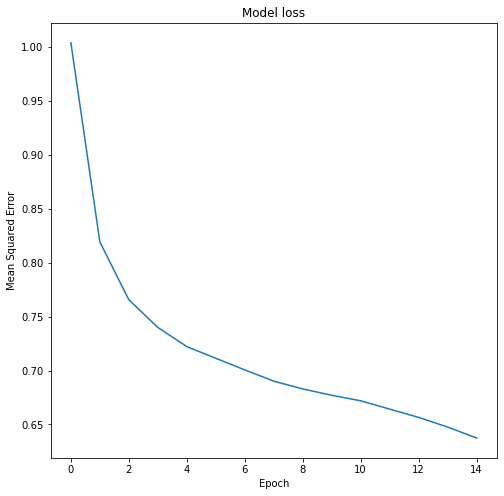

In [64]:
plt.figure(figsize=(8, 8))  #Plot of error VS. epochs
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

**Conclusions**

- Sucessfully scaled our data to avoid over-sampling, to prepare data for splitting into training and training, as shown.
- We splitted the data into training, testing and validation, with 15 epochs
- We then created a neural network with 1 output layer and 123 weights (successfully trainable)
***
**Results after training model:**
* Model has a prediction with mean square error of around 0.6. This is a well trained model. The plot of mean square error vs epoch shows a decreasing (decay) curve as number of epochs increases. This is a fairly good result.